![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
# Start your code here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pingouin
# from statsmodels.formula.api import ols, logit
# from statsmodels.graphics.gofplots import qqplot
# from statsmodels.stats.multicomp import pairwise_tukeyhsd 
# from statsmodels.stats.power import TTestIndPower
# from statsmodels.sandbox.stats.multicomp import multipletests
# from scipy.stats.distributions import norm
# from scipy.stats import mannwhitneyu, kruskal, boxcox, ttest_ind, f_oneway, chi2_contingency, shapiro, anderson


## Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a 10% significance level.

## For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

## The p-value and the result of the test must be stored in a dictionary called result_dict in the form:
## result_dict = {"p_val": p_val, "result": result}

## where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

### Exploratory data analysis

In [2]:
# Load the data from men_results.csv and women_results.csv to understand its contents.

# specifying dtype when reading tournament column by creating dictionaries
the_arranger = {"tournament": "category",}

men_results = pd.read_csv("men_results.csv", date_parser= ['date'], dtype= the_arranger)
women_results= pd.read_csv("women_results.csv", date_parser= ['date'], dtype= the_arranger)

In [3]:
# convert the date column to datetime format
men_results['date'] = pd.to_datetime(men_results['date'], errors= 'coerce')
women_results['date'] = pd.to_datetime(women_results['date'], errors= 'coerce')

In [4]:

print("women total datashape", women_results.shape)

women_results.head(10)

women total datashape (4884, 7)


Unnamed: 0       date    home_team  ... home_score  away_score        tournament
0           0 1969-11-01        Italy  ...          1           0              Euro
1           1 1969-11-01      Denmark  ...          4           3              Euro
2           2 1969-11-02      England  ...          2           0              Euro
3           3 1969-11-02        Italy  ...          3           1              Euro
4           4 1975-08-25     Thailand  ...          3           2  AFC Championship
5           5 1975-08-25    Hong Kong  ...          0           2  AFC Championship
6           6 1975-08-27     Thailand  ...          3           0  AFC Championship
7           7 1975-08-27  New Zealand  ...          3           0  AFC Championship
8           8 1975-08-29    Australia  ...          3           0  AFC Championship
9           9 1975-08-29    Hong Kong  ...          0           2  AFC Championship

[10 rows x 7 columns]

In [5]:
men_results.tail()

Unnamed: 0       date  home_team  ... home_score  away_score      tournament
44348       44348 2022-12-14   Thailand  ...          0           1        Friendly
44349       44349 2022-12-14    Vietnam  ...          1           0        Friendly
44350       44350 2022-12-17    Croatia  ...          2           1  FIFA World Cup
44351       44351 2022-12-17  Singapore  ...          3           1        Friendly
44352       44352 2022-12-18  Argentina  ...          3           3  FIFA World Cup

[5 rows x 7 columns]

In [6]:
# create a new column for total goal correcting eact match

men_results['total_match_goals'] = men_results['home_score'] + men_results['away_score']
women_results['total_match_goals'] = women_results['home_score'] + women_results['away_score']

In [7]:
print(men_results['tournament'].value_counts(dropna= 0))
print(women_results['tournament'].value_counts(dropna= 0))

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
FIFA 75th Anniversary Cup                   1
Real Madrid 75th Anniversary Cup            1
Copa Confraternidad                         1
TIFOCO Tournament                           1
Évence Coppée Trophy                        1
Name: tournament, Length: 141, dtype: int64
UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143


In [8]:
#women_results.drop(columns=['Unnamed: 0'], inplace= True)
#men_results.drop(columns=['Unnamed: 0'], inplace= True)

### Filtering the data

In [9]:
# bitwise filtering of both FIFA World Cup and 2002 for both men and women's 

men_results2002 = men_results.loc[(men_results['tournament']=='FIFA World Cup')&(men_results['date']>='2002-01-01')]
women_results2002 = women_results.loc[(women_results['tournament']=='FIFA World Cup')&(women_results['date']>='2002-01-01')]

In [10]:
print(men_results.info())
print(women_results.info())
print(men_results.describe(include= 'all'))
print(women_results.describe(include= 'all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         44353 non-null  int64         
 1   date               44353 non-null  datetime64[ns]
 2   home_team          44353 non-null  object        
 3   away_team          44353 non-null  object        
 4   home_score         44353 non-null  int64         
 5   away_score         44353 non-null  int64         
 6   tournament         44353 non-null  category      
 7   total_match_goals  44353 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(4), object(2)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         4884 non-null  

### Choosing the correct hypothesis test

Using EDA to determine the appropriate hypothesis test for this dataset and scenario.

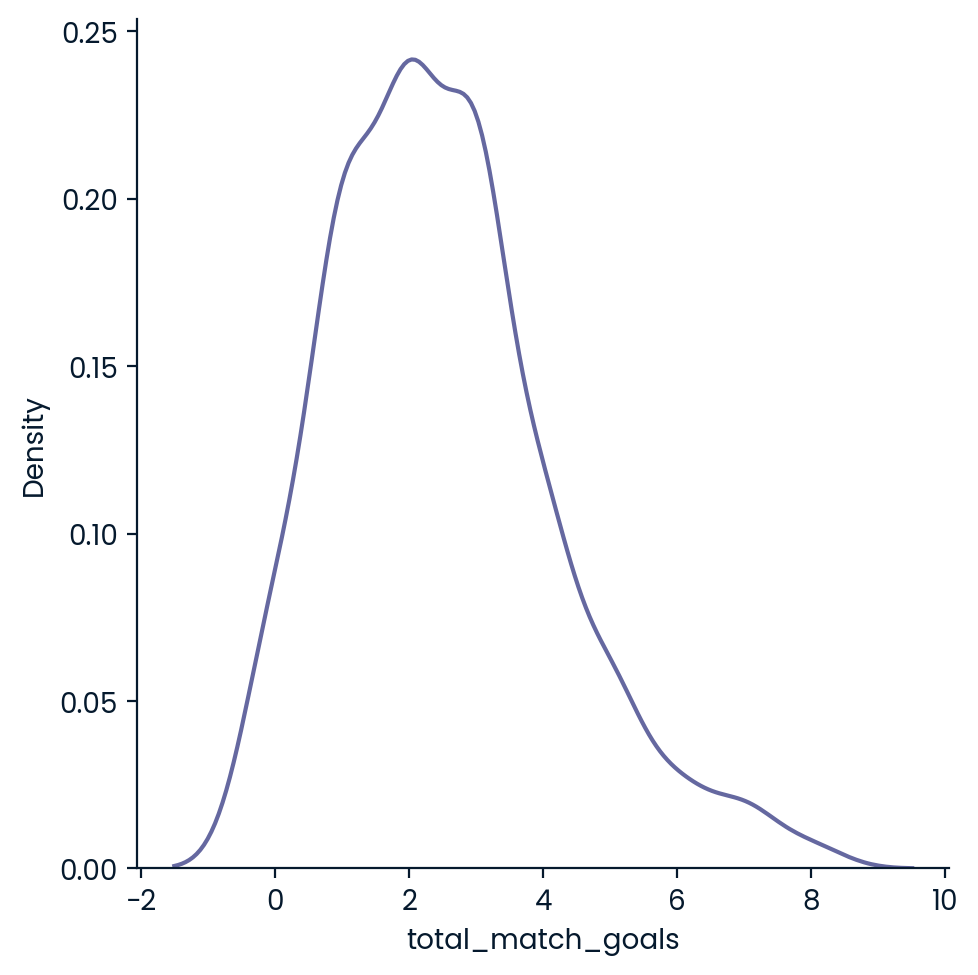

In [11]:
# Visualizing Normal Data

sns.displot(data= men_results2002, x='total_match_goals', kind= 'kde')
plt.show()

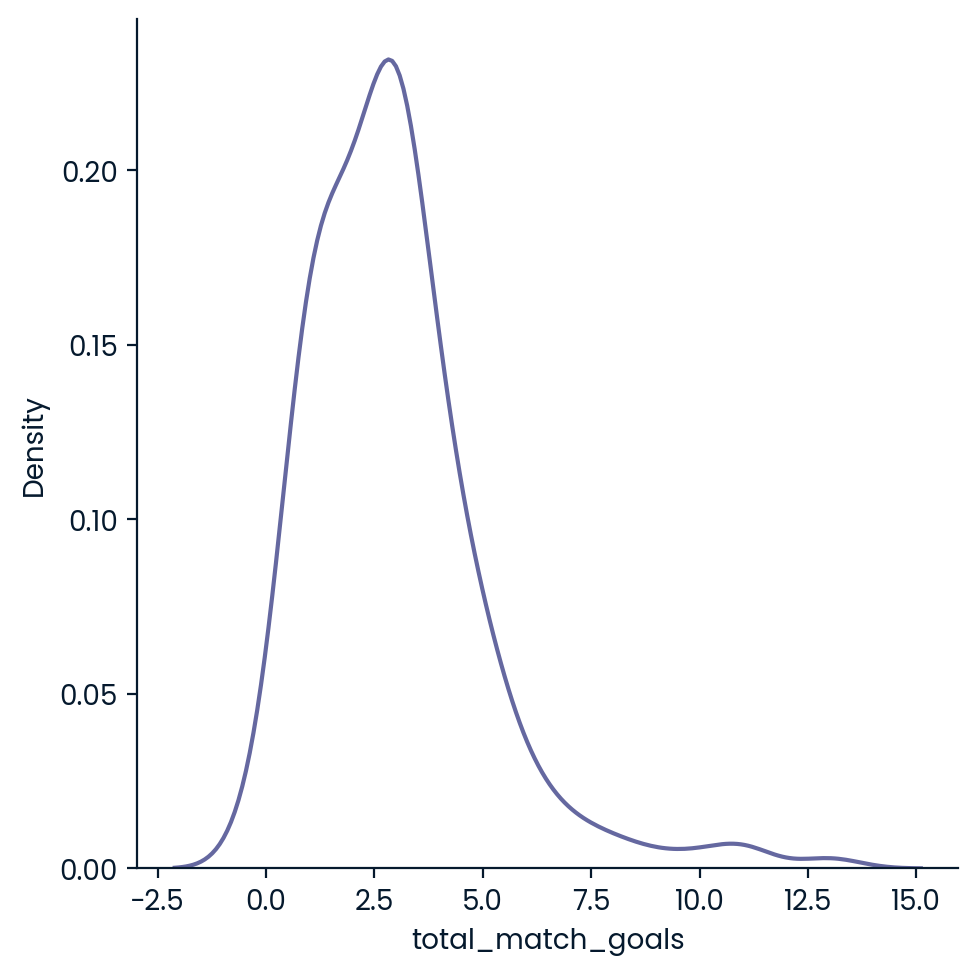

In [12]:
sns.displot(data= women_results2002, x='total_match_goals', kind= 'kde')
plt.show()

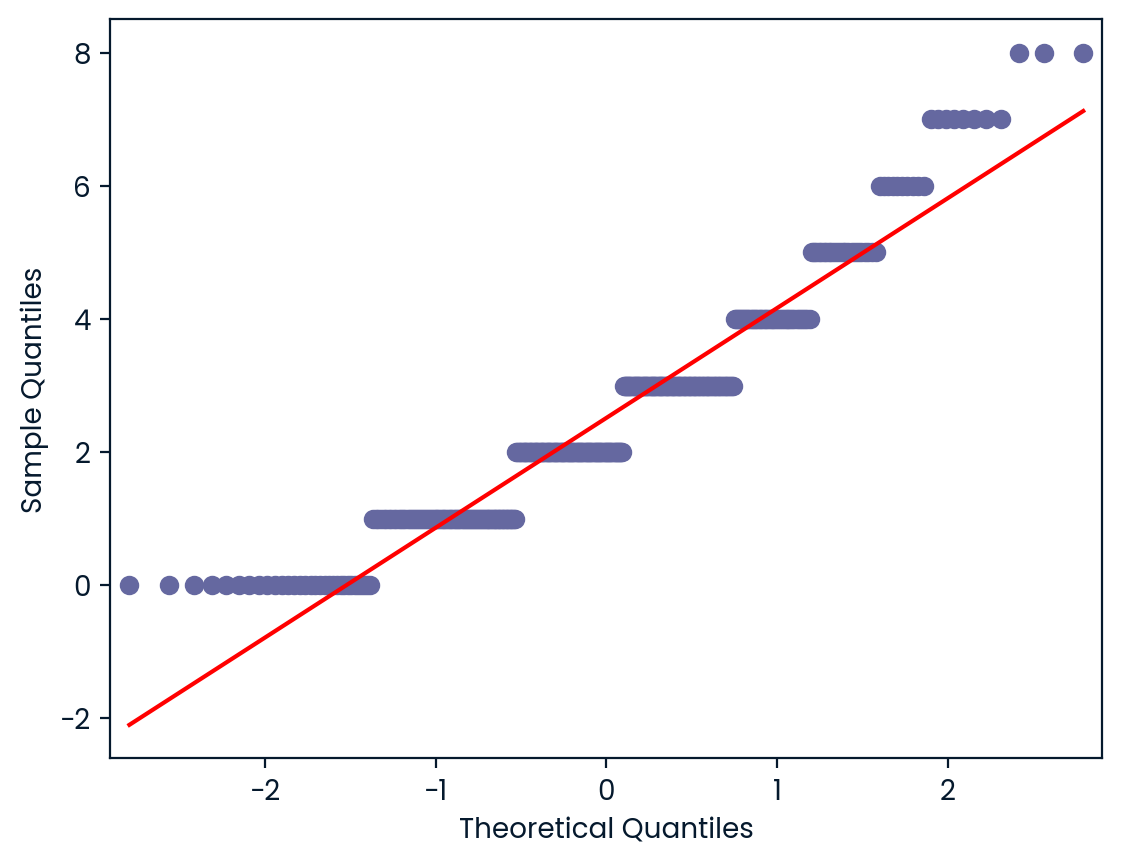

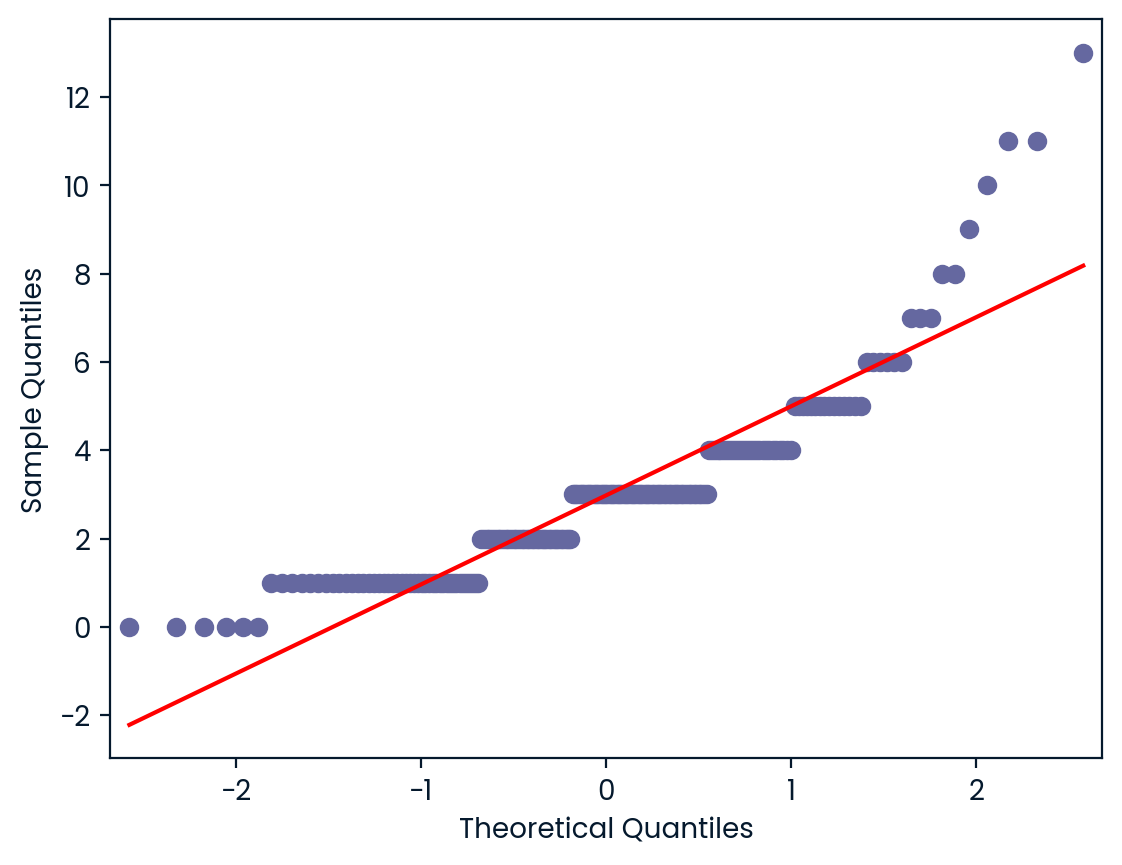

In [13]:
# QQ plot to compare data to a particular distribution

from scipy.stats.distributions import norm
from statsmodels.graphics.gofplots import qqplot

qqplot(men_results2002['total_match_goals'], line= 's', dist= norm)
qqplot(women_results2002['total_match_goals'], line= 's', dist= norm)
plt.show()

In [14]:
from scipy.stats import anderson
alpha = 0.05
ander_men_result = anderson(x= men_results2002['total_match_goals'], dist= "norm")
ander_women_result = anderson(x= women_results2002['total_match_goals'], dist= "norm")

In [15]:
# Anderson-Darling Test for women total goals in match to see if it is normally Distributed
print(round(ander_women_result.statistic,4))
print(ander_women_result.significance_level)
print(ander_women_result.critical_values)

# Anderson-Darling Test for Men total goals in match to see if it is normally Distributed
print(round(ander_men_result.statistic,4))
print(ander_men_result.significance_level)
print(ander_men_result.critical_values)

7.2168
[15.  10.   5.   2.5  1. ]
[0.565 0.644 0.772 0.901 1.071]
9.1068
[15.  10.   5.   2.5  1. ]
[0.57  0.649 0.779 0.909 1.081]


When using an Anderson-Darling Test... If the test statistic is higher than the critical value, the null hypothesis is rejected at that particular significance level, and the data is not normal.

In [16]:
#  Shapiro–Wilk test just for confirmation

from scipy.stats import shapiro
stat_men, p_value_men = shapiro(men_results2002['total_match_goals'])
stat_women, p_value_women = shapiro(women_results2002['total_match_goals'])

print(f"p_women: {round(p_value_women,3)} test stat women: {round(stat_women,4)}")
print(f"p_men: {round(p_value_men,4)} test stat men: {round(stat_men,4)}")

print('p_value_men', p_value_men)
print('p_value_women', p_value_women)

p_women: 0.0 test stat women: 0.8491
p_men: 0.0 test stat men: 0.9266
p_value_men 8.894154401688226e-13
p_value_women 3.8905201759850683e-13


# **Reject the Null Hypothesis that both Men and Women data are Normal Distributed**

Therefore we go for a **Non-Parameteric Test**

In [17]:
alpha

0.05

### Performing the hypothesis test

Are more goals scored in women's international soccer matches than men's?

You assume a 10% significance level, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [18]:
# pingouin na Baba
import pingouin

# 10% significance level
alpha = 0.1

# Wilcoxon-Mann-Whitney test Also know as the Mann Whitney U test. A t-test on the ranks of the numeric input
# Works on unpaired data
mann_wit_unpaired = pingouin.mwu(x= men_results2002['total_match_goals']
            ,y= women_results2002['total_match_goals']
            ,alternative= 'greater')

In [19]:
mann_wit_unpaired.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, MWU to MWU
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   U-val        1 non-null      float64
 1   alternative  1 non-null      object 
 2   p-val        1 non-null      float64
 3   RBC          1 non-null      float64
 4   CLES         1 non-null      float64
dtypes: float64(4), object(1)
memory usage: 48.0+ bytes


In [20]:
p_val = mann_wit_unpaired['p-val'][0]

In [21]:
if p_val > alpha:
    result = "fail to reject"
    print("the average number of goals scored in women's international football matches na the same as men's")
else:
    result = "reject"
    print('What number of goals men can score, a women can score more better')

the average number of goals scored in women's international football matches na the same as men's


In [22]:
result

'fail to reject'

In [23]:
#result_dict = {"p_val": p_val, "result": result}

## **DataCamp**

In [24]:
from scipy.stats import mannwhitneyu

# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")


In [25]:
# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]


In [26]:
# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

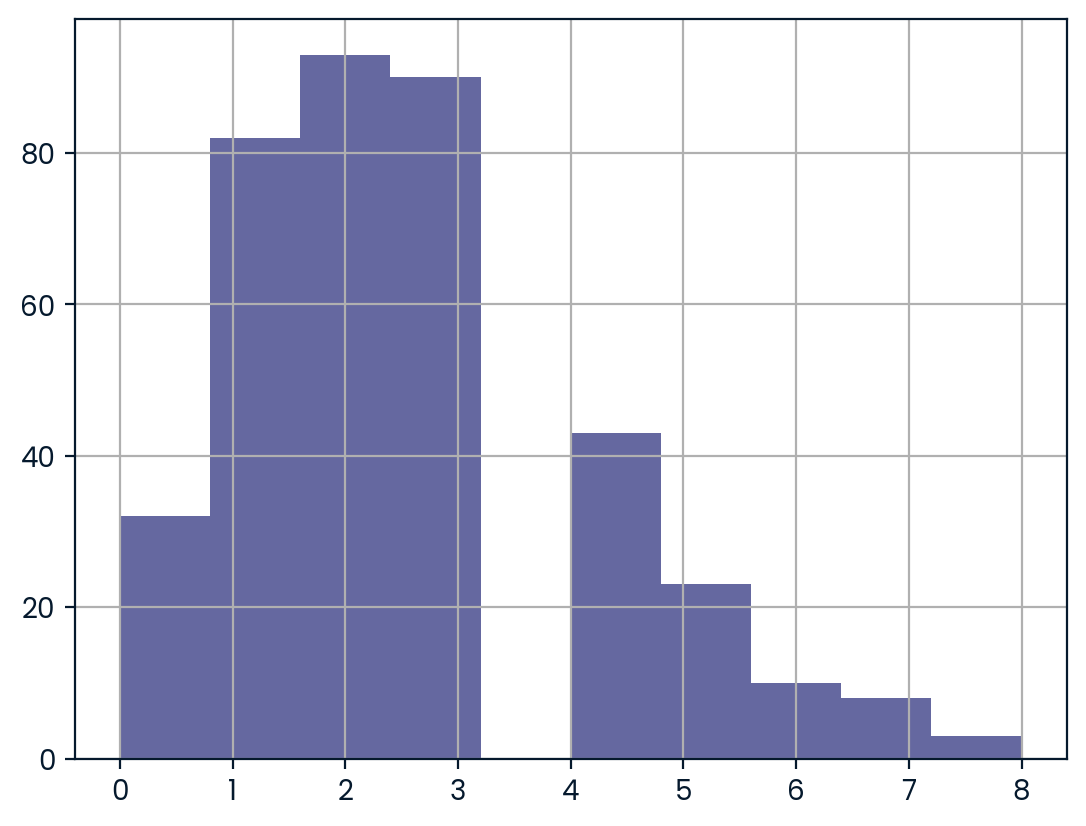

<Figure size 640x480 with 0 Axes>

In [27]:
# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.show()
plt.clf()


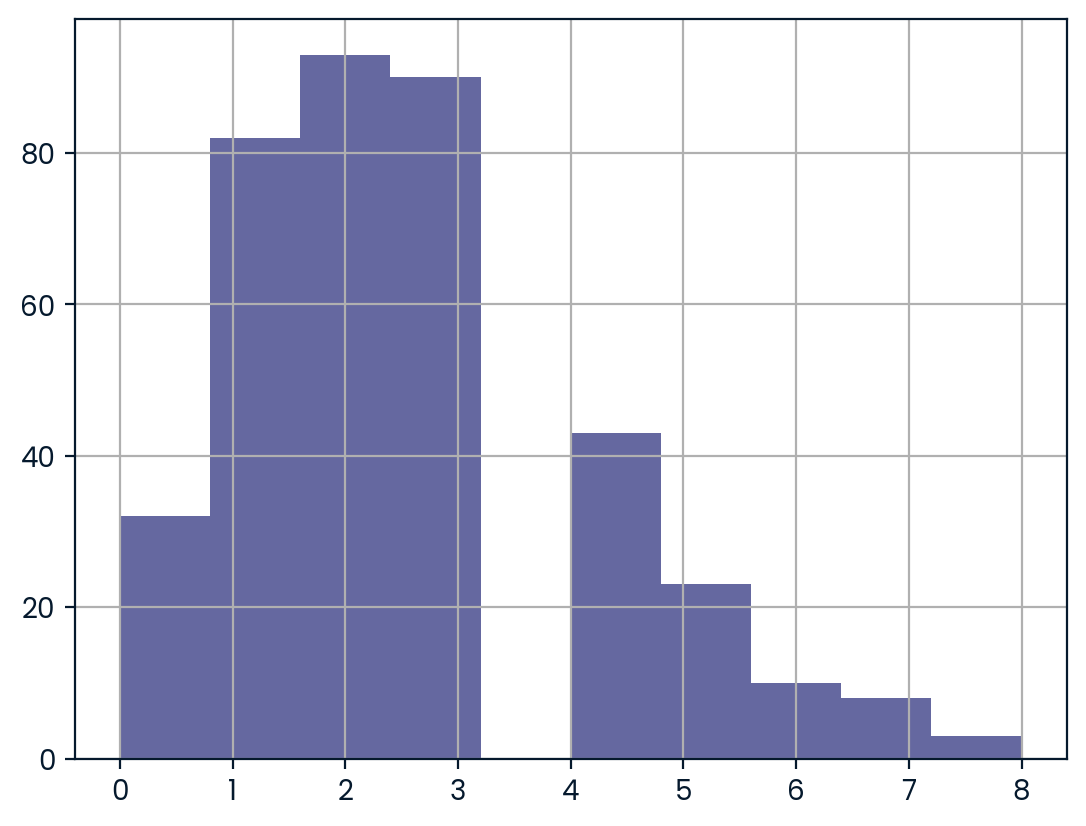

<Figure size 640x480 with 0 Axes>

In [28]:
# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

In [29]:
# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

In [30]:

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

In [31]:
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}